In [1]:
# things we need for NLP

import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

# things we need for Tensorflow
import numpy as np
import tensorflow as tf
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install tensorflow


In [46]:
# import training dataset
import json
with open("C:/Users\RSHAF/Desktop/chatbot/datas.json") as f:
    intents = json.load(f)

In [47]:
type(intents["intents"])

list

In [48]:
nltk.download('punkt')
vocab = []  # for vocabulary
classes = [] #tags
documents = [] # contain questions/ user inputs and the tags
ignore_words = ['?']  #remove punctuations
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        vocab.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
vocab = [stemmer.stem(w.lower()) for w in vocab if w not in ignore_words]  #converting the words to lower and then stemming the words
vocab = sorted(list(set(vocab)))  #converting it to set so that it removes the duplicate words, and then again converting it to list


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RSHAF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:

classes = sorted(list(set(classes)))

print (len(documents), "documents")
print(documents)
print (len(classes), "classes", classes)
print (len(vocab), "unique stemmed words", vocab)

75 documents
[(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Whats', 'up'], 'greeting'), (['cya'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['I', 'am', 'Leaving'], 'goodbye'), (['Have', 'a', 'Good', 'day'], 'goodbye'), (['Good', 'morning'], 'morning'), (['morning'], 'morning'), (['mrg'], 'morning'), (['what', 'is', 'your', 'name'], 'name'), (['what', 'should', 'I', 'call', 'you'], 'name'), (['whats', 'your', 'name', '?'], 'name'), (['Could', 'you', 'please', 'tell', 'me', 'your', 'name', '?'], 'name'), (['who', 'are', 'you', '?'], 'name'), (['Good', 'afternoon'], 'afternoon'), (['afternoon'], 'afternoon'), (['aftnoon'], 'afternoon'), (['when', 'are', 'you', 'guys', 'open', '?'], 'hours'), (['what', 'are', 'your', 'working', 'hours'], 'hours'), (['hours', 'of', 'operation'], 'hours'), (['Could', 'you', 'please', 'tell', 'me', 'working', 'hours', 'so', 'that', 'i', 'c

In [50]:

# create our training data
training = []
# create an empty array for our output
output = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in vocab:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])
     

In [51]:
print("training data input:",train_x[0])
print("training data output",train_y[0])

training data input: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
training data output [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [52]:
testing = []

vocab2 = []  # for vocabulary
classes2 = [] #tags
documents2 = [] # contain questions/ user inputs and the tags
ignore_words2 = ['?','!']  #remove punctuations
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        vocab2.extend(w)
        # add to documents in our corpus
        documents2.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes2:
            classes2.append(intent['tag'])

# stem and lower each word and remove duplicates
vocab2 = [stemmer.stem(w.lower()) for w in vocab2 if w not in ignore_words2]  #converting the words to lower and then stemming the words
vocab2 = sorted(list(set(vocab2))) 

In [53]:
classes2 = sorted(list(set(classes2)))

print (len(documents2), "documents2")
print(documents2)
print (len(classes2), "classes", classes2)
print (len(vocab2), "unique stemmed words2", vocab2)

75 documents2
[(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Whats', 'up'], 'greeting'), (['cya'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['I', 'am', 'Leaving'], 'goodbye'), (['Have', 'a', 'Good', 'day'], 'goodbye'), (['Good', 'morning'], 'morning'), (['morning'], 'morning'), (['mrg'], 'morning'), (['what', 'is', 'your', 'name'], 'name'), (['what', 'should', 'I', 'call', 'you'], 'name'), (['whats', 'your', 'name', '?'], 'name'), (['Could', 'you', 'please', 'tell', 'me', 'your', 'name', '?'], 'name'), (['who', 'are', 'you', '?'], 'name'), (['Good', 'afternoon'], 'afternoon'), (['afternoon'], 'afternoon'), (['aftnoon'], 'afternoon'), (['when', 'are', 'you', 'guys', 'open', '?'], 'hours'), (['what', 'are', 'your', 'working', 'hours'], 'hours'), (['hours', 'of', 'operation'], 'hours'), (['Could', 'you', 'please', 'tell', 'me', 'working', 'hours', 'so', 'that', 'i', '

In [54]:
# create our training data
testing = []
#output = []
# create an empty array for our output
output2 = [0] * len(classes)
print(len(output2))
# training set, bag of words for each sentence
for doc in documents2:
    # initialize our bag of words
    bag2 = []
    # list of tokenized words for the pattern
    pattern_words2 = doc[0]
    # stem each word
    pattern_words2 = [stemmer.stem(word.lower()) for word in pattern_words2]
    # create our bag of words array
    for w in vocab:
        bag2.append(1) if w in pattern_words2 else bag2.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row2 = list(output2)
    output_row2[classes.index(doc[1])] = 1

    testing.append([bag2, output_row2])

# shuffle our features and turn into np.array
random.shuffle(testing)
testing = np.array(testing)

# create train and test lists
test_x = list(testing[:,0])
test_y = list(testing[:,1])

23


In [55]:
len(test_x[0])

117

In [56]:
len(train_x[0])

117

In [57]:

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()


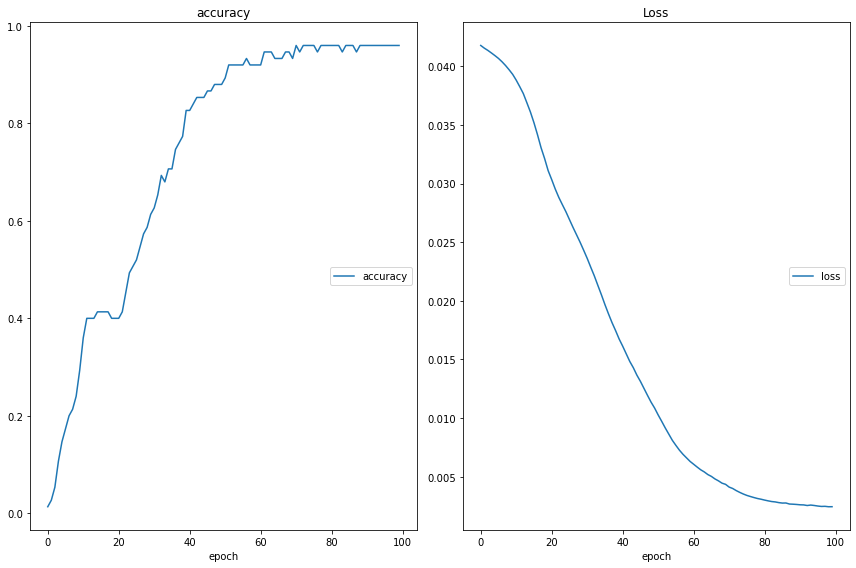

accuracy
	accuracy         	 (min:    0.013, max:    0.960, cur:    0.960)
Loss
	loss             	 (min:    0.002, max:    0.042, cur:    0.002)
10/10 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9600


In [58]:


#sequential neural network model

model = tf.keras.Sequential([tf.keras.layers.Dense(16, input_shape = (None,len(train_x[0]))), # input layer 
                             tf.keras.layers.Dense(10), #hidden layer

                             tf.keras.layers.Dense(len(train_y[0]),activation="softmax"),]) #output layer
model.compile(optimizer = "adam",loss = "mean_squared_error",metrics = ['accuracy'])
model.fit(train_x, train_y, epochs=100, batch_size=8,callbacks=[plot_losses])
model.save('model.keras')



In [59]:

# Evaluation of the model with test data

scores = model.evaluate(test_x,test_y)
print("test loss:",scores[0])
print("test accuracy:", scores[1])

3/3 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.9600
test loss: 0.0024074246175587177
test accuracy: 0.9599999785423279


In [60]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [61]:

import pickle
pickle.dump( {'vocab':vocab, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

In [63]:
#restore all of our data structures
import pickle
data = pickle.load( open( "training_data", "rb" ) )
vocab = data['vocab']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']

# import our chat-bot intents file
import json
with open("C:/Users/RSHAF/Desktop/chatbot/datas.json") as f:
    intents = json.load(f)

In [64]:
# convert user input to BOW
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    bag = np.array(bag)
    bag= bag.tolist()
    return(bag)
     

In [66]:
data['vocab']

[',',
 '.',
 'a',
 'about',
 'address',
 'admit',
 'afternoon',
 'aftnoon',
 'am',
 'anyon',
 'ar',
 'bba',
 'be',
 'behind',
 'bhast',
 'bit',
 'bitch',
 'busy',
 'cal',
 'can',
 'colleg',
 'contact',
 'could',
 'cours',
 'cya',
 'day',
 'develop',
 'did',
 'do',
 'doing',
 'email',
 'ev',
 'field',
 'fin',
 'follow',
 'from',
 'fuck',
 'get',
 'giv',
 'good',
 'goodby',
 'gud',
 'guy',
 'hav',
 'head',
 'hello',
 'hey',
 'hi',
 'hour',
 'how',
 'i',
 'ide',
 'in',
 'is',
 'it',
 'join',
 'kamin',
 'khat',
 'kind',
 'kutt',
 'lat',
 'leav',
 'madarg',
 'mail',
 'me',
 'ment',
 'method',
 'morn',
 'moth',
 'mrg',
 'mug',
 'nam',
 'namask',
 'namasta',
 'numb',
 'o',
 'of',
 'oi',
 'okay',
 'op',
 'part',
 'pleas',
 'program',
 'provid',
 'requir',
 'sal',
 'see',
 'should',
 'sir/mam',
 'situ',
 'so',
 'son',
 'stud',
 'study',
 'tauko',
 'teach',
 'techn',
 'tel',
 'tero',
 'that',
 'the',
 'ther',
 'thi',
 'through',
 'to',
 'too',
 'up',
 'us',
 'visit',
 'what',
 'when',
 'wher',
 

In [68]:
x = bow("afternoon",vocab)
print(x)
     

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [69]:
rate = 0.25
def classify(sentence):
    # generate probabilities from the model
    results = model.predict([bow(sentence, vocab)])[0]
    print(results)
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>rate]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # a random response from the intent
                    return print(random.choice(i['responses']))

            results.pop(0)

In [70]:
classify("hello")

1/1 [==============================] - 0s 61ms/step
[1.7114691e-04 3.3401735e-03 4.7375201e-03 1.9576857e-03 1.5076809e-02
 1.2782238e-04 9.7353396e-04 2.6827366e-03 6.8414741e-04 5.4715503e-05
 8.9641858e-04 1.8407609e-02 8.9027858e-01 3.2636698e-03 2.3271670e-04
 1.3391788e-02 1.0195915e-03 2.8484918e-03 4.7825975e-04 3.6707588e-02
 2.2335371e-03 1.1915276e-04 3.1637927e-04]


[('greeting', 0.8902786)]

In [72]:
classify("afternoon")

1/1 [==============================] - 0s 20ms/step
[6.2723033e-04 3.9256591e-04 2.3554002e-03 5.0534809e-04 9.1218019e-01
 1.2949309e-03 1.9814852e-03 3.7598878e-05 5.8226618e-03 6.5869070e-03
 5.6166522e-04 4.8783896e-03 6.0174074e-03 1.2279689e-02 9.7448443e-04
 1.5519511e-02 3.0998732e-03 2.2431375e-02 4.5365753e-04 6.1842124e-04
 1.3205643e-03 4.8883532e-05 1.1777516e-05]


[('afternoon', 0.9121802)]

In [73]:

def start_chat():
  print(":start")
  while True:
    inp = input("me:")
    if inp.lower() == "quit":
      
      break

    result = model.predict([[bow(inp,vocab)]])
    
    result_ind = np.argmax(result)
    tag = classes[result_ind]
    
    for tg in intents["intents"]:
      if tg["tag"] == tag:
        responses = tg["responses"]

    print(random.choice(responses))
    


start_chat()

:start
me:hi
1/1 [==============================] - 0s 70ms/step
Hi there, how can I help?
me:afternoon
1/1 [==============================] - 0s 21ms/step
Good afternoon sir/mam. How can i assist you?
me:quit


In [74]:
for i in intents["intents"]:
  if i["tag"] == "greeting":
    responses = i["responses"]
print(responses)


['Hello!', 'Good to see you', 'Hi there, how can I help?']
